In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from urllib import parse
# from langdetect import detect
# import langid
import requests
import json
import pickle


In [2]:
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,selftext,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,null,null,True,slicely,null,null,1206868740,1206865140,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,"Switzerland ""no longer a special case""",0,http://www.swissinfo.ch/eng/front/Switzerland_...
1,null,null,True,slicely,null,null,1206877349,1206873749,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Saving the planet,1,http://www.swissinfo.ch/eng/front/Saving_the_p...
2,null,null,True,slicely,null,null,1208163597,1208159997,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Small fish wins big prize,0,http://www.swissinfo.ch/eng/front/Small_fish_w...
3,null,null,True,swissinfo,null,null,1208196947,1208193347,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Die EU will die Abgaben für Schwerverkehr nach...,1,http://www.swissinfo.ch/ger/startseite/Die_EU_...
4,null,null,True,swissinfo,null,null,1208203041,1208199441,null,null,...,NaN,False,Switzerland,t5_2qhp6,null,null,default,Immer mehr Frauen in Kaderpositionen,1,http://www.swissinfo.ch/ger/startseite/Geschae...


In [4]:
dfs.columns

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'created', 'created_utc',
       'disable_comments', 'distinguished', 'domain', 'downs', 'edited',
       'from', 'from_id', 'from_kind', 'gilded', 'hide_score', 'href_url',
       'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text',
       'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'third_party_tracking', 'third_party_tracking_2',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

In [7]:
dfs.shape

(6652, 50)

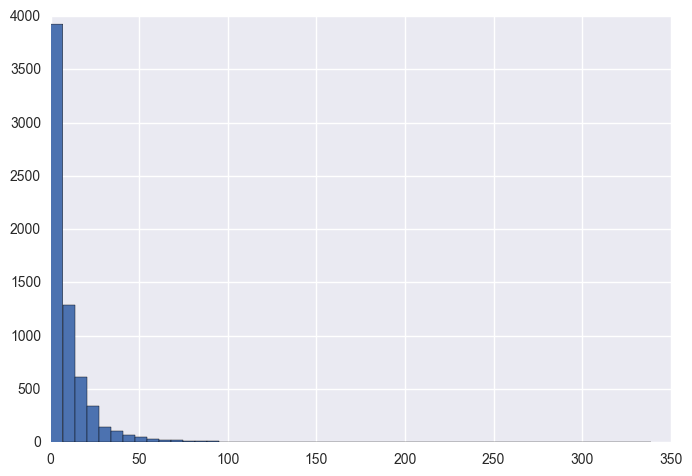

In [5]:
dfs.num_comments.hist(bins=50)

look like a power-law

In [6]:
dfs.num_comments.describe()

count    6652.000000
mean        9.262177
std        15.398787
min         0.000000
25%         0.000000
50%         4.000000
75%        12.000000
max       339.000000
Name: num_comments, dtype: float64

## Popular Swiss subreddits

In [19]:
df_sr = dfs.groupby(['subreddit'])
df_sr['title'].count()

subreddit
BielBienne             11
CERN                  370
CHTrees                49
EPFL                  106
Fribourg                2
Luzern                 19
SanktGallen            16
Schaffhausen          112
SwissArmyKnives        29
SwissBuyers            25
SwissGaming             3
SwissGuns              46
SwissHistory            1
SwissMountainDogs      41
SwissRap               53
SwissSuperLeague        3
Switzerland          5726
Ticino                  6
UZH                    19
Zermatt                15
Name: title, dtype: int64

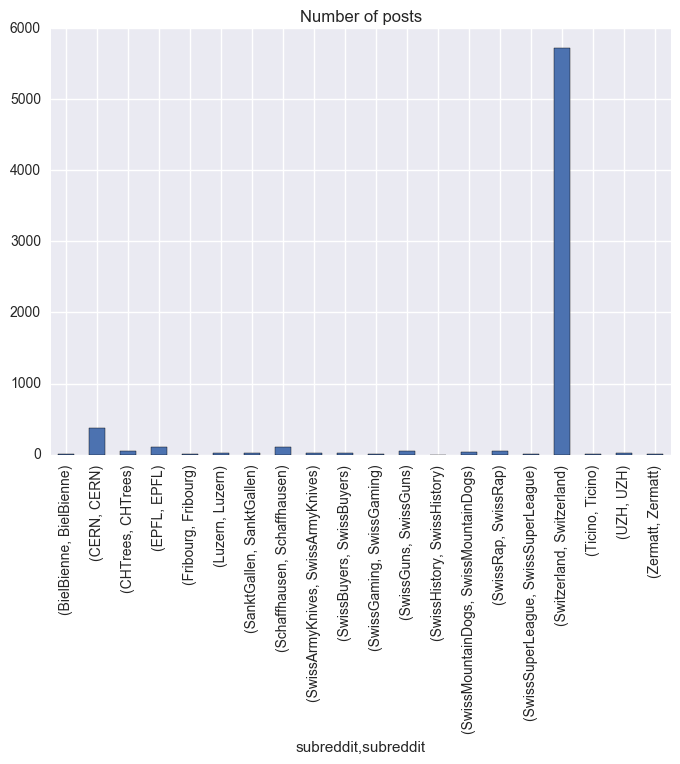

In [20]:
df_sr.subreddit.value_counts().plot(kind='bar', title='Number of posts')

## Swiss subreddits over years

In [21]:
from datetime import datetime

In [22]:
dates = [datetime.fromtimestamp(t) for t in dfs['created_utc'].astype(int)]

In [23]:
dfs['dates'] = dates
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,lang,dates
0,null,null,True,slicely,null,null,1206868740,1206865140,null,null,...,Switzerland,t5_2qhp6,null,null,default,"Switzerland ""no longer a special case""",0,http://www.swissinfo.ch/eng/front/Switzerland_...,en,2008-03-30 10:19:00
1,null,null,True,slicely,null,null,1206877349,1206873749,null,null,...,Switzerland,t5_2qhp6,null,null,default,Saving the planet,1,http://www.swissinfo.ch/eng/front/Saving_the_p...,en,2008-03-30 12:42:29
2,null,null,True,slicely,null,null,1208163597,1208159997,null,null,...,Switzerland,t5_2qhp6,null,null,default,Small fish wins big prize,0,http://www.swissinfo.ch/eng/front/Small_fish_w...,en,2008-04-14 09:59:57
3,null,null,True,swissinfo,null,null,1208196947,1208193347,null,null,...,Switzerland,t5_2qhp6,null,null,default,Die EU will die Abgaben für Schwerverkehr nach...,1,http://www.swissinfo.ch/ger/startseite/Die_EU_...,de,2008-04-14 19:15:47
4,null,null,True,swissinfo,null,null,1208203041,1208199441,null,null,...,Switzerland,t5_2qhp6,null,null,default,Immer mehr Frauen in Kaderpositionen,1,http://www.swissinfo.ch/ger/startseite/Geschae...,de,2008-04-14 20:57:21


## Language analysis

In [8]:
key = 'trnsl.1.1.20161217T110744Z.5a3d3205dda61dc1.1ee8de2264ffa3c0be3c20cdf0568ed7231929ef'
url = 'https://translate.yandex.net/api/v1.5/tr.json/detect?key='+key+'&text='+dfs['title'].iloc[0]

query = parse.quote(url,safe=':/&=?')
print(query)
response = json.loads(requests.get(query).text)
print(response)
language = response['lang']
print(language)

https://translate.yandex.net/api/v1.5/tr.json/detect?key=trnsl.1.1.20161217T110744Z.5a3d3205dda61dc1.1ee8de2264ffa3c0be3c20cdf0568ed7231929ef&text=Switzerland%20%22no%20longer%20a%20special%20case%22
{'code': 200, 'lang': 'en'}
en


In [ ]:
lang = list()
for i in range(len(dfs)):
    title = dfs['title'].iloc[i]
    if (i % 100) == 0:
        print(i)
    try:
        url = 'https://translate.yandex.net/api/v1.5/tr.json/detect?key='+key+'&text='+dfs['title'].iloc[i]
        query = parse.quote(url,safe=':/&=?')
        response = json.loads(requests.get(query).text)
        language = response['lang']
        lang.append(language)
        
    except:
        print("Error:" + title)
        lang.append('NaN')
        
dfs['lang'] = lang

In [26]:
with open('../data/submissions_processed.pickle', 'wb') as handle:
    pickle.dump(dfs, handle)

In [11]:
dfs.groupby(['lang']).count()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,selftext,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
lang,,,,,,,,,,,,,,,,,,,,,
,2,2,2,2,2,2,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2
ar,3,3,3,3,3,3,3,3,3,3,...,1,3,3,3,3,3,2,3,3,3
bg,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
ca,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1
cs,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
de,833,833,833,833,833,831,833,833,833,833,...,129,833,833,833,833,833,803,833,833,833
en,5611,5611,5611,5611,5606,5579,5611,5611,5611,5611,...,2810,5611,5611,5611,5611,5611,5261,5611,5611,5611
es,10,10,10,10,10,10,10,10,10,10,...,1,10,10,10,10,10,7,10,10,10
et,3,3,3,3,3,3,3,3,3,3,...,1,3,3,3,3,3,3,3,3,3


In [15]:
dfs[dfs.lang == 'es'].title.head(10)

80        Barceló unveils UN "Sistine Chapel" in Geneva
42              A Swiss home for Guantánamo ex-inmates?
55            Geneva ready to take Guantánamo prisoners
4                                     Lugano University
10    Abrir una cuenta bancaria en Suiza con SwissQuote
4                                         Hello Geneva!
0                    El fútbol suizo por Victor Sanchez
9                                     Parla vò arpitan?
10                                    Parla vó arpitan?
6                     Eldorado FM - Freinacht in Potosí
Name: title, dtype: object

## Popular and controversial comments

In [85]:
df_popular = dfs.sort_values(by='score', axis=0, ascending=False)
df_popular = df_popular

<Container object of 6652 artists>

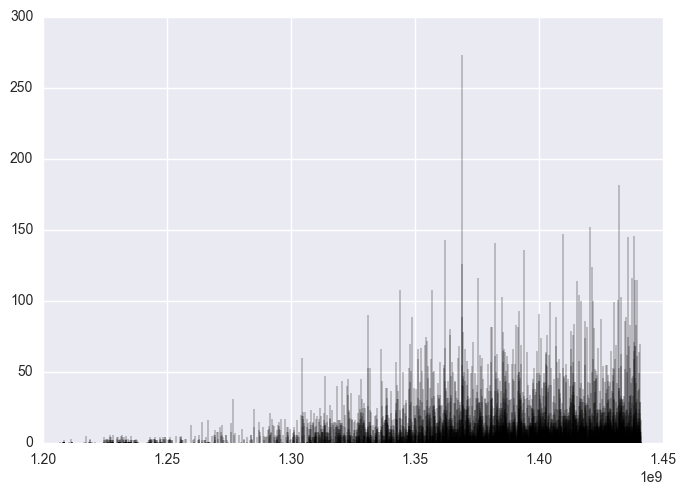

In [86]:
plt.bar(df_popular['created_utc'], df_popular['score'])

In [67]:
month_dic = ['Jan','Feb','March','April','May','June','July','August','Sept','Oct','Nov','Dec']
month_dic[dfs.dates.iloc[0].month] + '_' + str(dfs.dates.iloc[0].year)
dfs['month_year'] = [month_dic[dfs.dates.iloc[i].month-1] + '_' + str(dfs.dates.iloc[i].year) for i in range(len(dfs))]

In [64]:
dfs.sort_values('num_comments',ascending=False).dates.head(20)

5    2014-02-09 12:23:34
3    2015-03-29 11:22:20
8    2015-06-01 14:52:12
32   2015-03-13 13:37:11
0    2015-02-10 08:03:14
11   2015-07-25 22:45:28
3    2014-09-28 23:47:53
21   2013-10-21 23:40:07
10   2014-12-13 17:04:37
9    2015-05-24 11:18:19
4    2014-05-23 23:08:25
24   2014-11-08 04:51:04
11   2013-02-25 15:47:47
3    2015-04-29 11:00:11
17   2014-02-09 20:29:16
6    2014-08-25 17:46:56
5    2015-08-14 09:22:34
4    2014-03-11 20:17:05
1    2015-01-15 11:01:25
0    2015-06-14 10:31:00
Name: dates, dtype: datetime64[ns]

In [80]:
df_most_popular_per_month = dfs.groupby('month_year')[['num_comments','title','created_utc']].max()

<Container object of 89 artists>

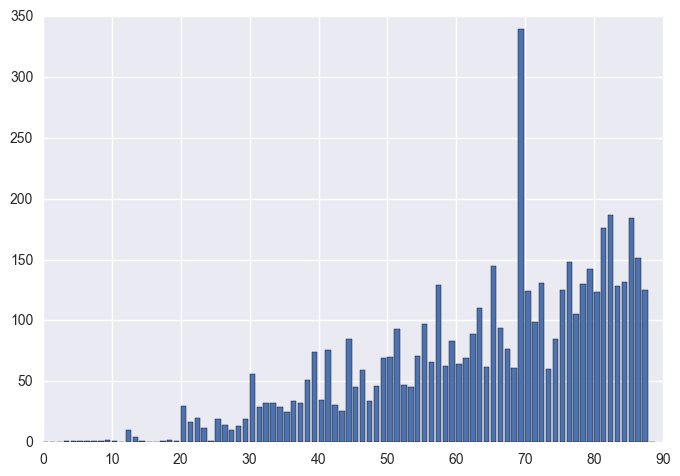

In [83]:
df_sorted = df_most_popular_per_month.sort_values('created_utc')
plt.bar(range(len(df_sorted.index)),df_sorted.num_comments)

In [84]:
df_most_popular_per_month.sort_values('created_utc')


,num_comments,title,created_utc
month_year,,,
March_2008,0,"Switzerland ""no longer a special case""",1206873749
April_2008,0,swissinfo Special - Deutsche in der Schweiz,1209530806
May_2008,0,Trade ties with South Africa get a boost,1211704706
July_2008,1,Why Romansh is has language status and Swiss G...,1217499327
August_2008,1,"Winterthur moves into the ""big city"" league",1220203366
Sept_2008,1,الخادمان يسحبان الشكوى بحق هانيبال نجل معمر ال...,1221408008
Oct_2008,1,ليبيا تعلن من جديد تجميد صادراتها من النفط إلى...,1225486213
Nov_2008,1,Zurich retail rent ranks with world's highest,1228069818
Dec_2008,1,Zurich court jails banker on fraud charges,1230731096
